In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)
print("set the printing size of the pandas df...")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# import sns and surpress warning
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("read in raw data and check")
df2 = pd.read_csv("../Data/51herds_raw.csv")

set the printing size of the pandas df...
read in raw data and check


In [95]:
print("Load packages ...")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# save in case of reloading
df = df2
save_df = df2

Load packages ...


# Adding useful variables

In [96]:
# ratio of fat/protein 
# ratio of max/min flow rate

# Environment: weather (cold or hot 0/1) 
# Cow info: 
    # DIM (3 stages), 
    # parity (0 or 2 or more), 
    # prior mastitis cases (have or not)
    
"""
method: 
    to create new variables 

arg: 
    df with columns: 
    ft_pcnt
    pt_pcnt
    milk_flow_max
    flow_min
"""
def add_cow_info(temp_df):

    # Cow info: 
    
    # DIM (3 stages), 
    temp_df.loc[temp_df['dim'] <= 100, 'lact_stage'] = 1
    temp_df.loc[temp_df['dim'] > 100, 'lact_stage'] = 2
    temp_df.loc[temp_df['dim'] > 200, 'lact_stage'] = 3
    
    # parity (0 or 2 or more), 
    temp_df.loc[temp_df['lact_no'] == 1, 'parity'] = 1  
    temp_df.loc[temp_df['lact_no'] == 2, 'parity'] = 2  
    temp_df.loc[temp_df['lact_no'] >= 3, 'parity'] = 3
    print()
    
    return temp_df

In [97]:
# parity 
# 1: 1 
# 2: 2
# 3: 3+

# lact 
# 1: < 100 
# 2: (100, 200) 
# 3: > 200

# change to string rather int

In [98]:
print("Adding cow_info and obtaining no_visit")
df_add_cow_info = add_cow_info(df)

Adding cow_info and obtaining no_visit



In [99]:
df_add_cow_info.head()

,Unnamed: 0.1,Unnamed: 0,hrd_ida,anm_ida,milkng_date,anb_cd,lact_no,lact_start_date,lact_end_date,dim,birth_date,stall_no,milkng_code,mk_wgt,milkng_start_date,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,milk_time,prep_time,milk_flow_avg,milk_flow_max,ft_pcnt,pt_pcnt,scc,milkng_temp,herd_cow,herd_robot,lact_stage,parity
0,0,0,6,2148,2022-01-01 07:20:23,HO,5.0,2020-08-26,2022-03-13,493.0,2013-05-11,102.0,0.0,11.2,2022-01-01 07:09:50,10.550000,5.150000,7.966667,3.700000,2.683333,7.966667,2.583333,1.4,3.7,5.417476,3.461845,NaN,38.9,2148006,102006.0,3.0,3.0
1,1,1,6,2148,2022-01-01 20:16:46,HO,5.0,2020-08-26,2022-03-13,493.0,2013-05-11,103.0,0.0,13.0,2022-01-01 20:08:59,7.783333,3.466667,5.000000,3.066667,3.350000,5.000000,2.783333,2.6,4.4,3.427184,3.393883,NaN,38.8,2148006,103006.0,3.0,3.0
2,2,2,6,2148,2022-01-02 10:06:59,HO,5.0,2020-08-26,2022-03-13,494.0,2013-05-11,103.0,0.0,10.6,2022-01-02 09:58:31,8.466667,4.133333,5.450000,2.983333,3.066667,5.450000,3.016667,1.9,3.5,4.718447,3.384175,112.0,38.3,2148006,103006.0,3.0,3.0
3,3,3,6,2148,2022-01-02 21:47:54,HO,5.0,2020-08-26,2022-03-13,494.0,2013-05-11,103.0,0.0,10.1,2022-01-02 21:38:17,9.616667,2.850000,5.166667,2.316667,3.033333,5.166667,4.450000,2.0,4.0,5.601942,3.481262,NaN,38.1,2148006,103006.0,3.0,3.0
4,4,4,6,2148,2022-01-03 12:21:50,HO,5.0,2020-08-26,2022-03-13,495.0,2013-05-11,103.0,0.0,11.2,2022-01-03 12:14:17,7.550000,3.566667,4.833333,3.233333,4.600000,4.833333,2.716667,2.3,3.6,5.427184,3.384175,NaN,38.1,2148006,103006.0,3.0,3.0


In [100]:
""" 
method: 
    1. first build min_milk_time, and var_milk_time 
    2. the groupby each variable: 
        adding: wk_wgt, 
        min: min_time
        max: var_time, milk_flow_max, scc
        ave: ft_pcnt, pt_pcnt, milkng_temp, dim, lact_no
     3. no_visit: using anm_ida + milkng_date
     4. cow_info: use anm_ida + milng_date + parity + dim + scc
     
arg: 
    df: dataframe with ... 
    
return:

"""
def add_variables(df): 
    
    # build min_time: min(lf, lr, rf, rr milk time) 
    min_time = df.loc[:,['lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']].min(axis=1)
    # add into the column
    df['min_time'] = min_time

    # get vars by rows from four selected columns
    var_time = df.loc[:,['lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']].var(axis=1)
    # append to the df dataset 
    df['var_time'] = var_time

    print("create herd cow date id")
    df['herd_cow_idx'] = df['anm_ida']*1000 + df['hrd_ida']
    # create a new variable that is unique for each cow and each day: anm_ida + milkng_date
    df['herd_cow_date'] = df['herd_cow_idx'].apply(lambda x: str(x) + "-") + df['milkng_date'].apply(lambda x: str(x))

    return df

In [101]:
"""using func: """
df_add_variables = add_variables(df_add_cow_info)

create herd cow date id


In [102]:
df_add_variables.head()

,Unnamed: 0.1,Unnamed: 0,hrd_ida,anm_ida,milkng_date,anb_cd,lact_no,lact_start_date,lact_end_date,dim,birth_date,stall_no,milkng_code,mk_wgt,milkng_start_date,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,milk_time,prep_time,milk_flow_avg,milk_flow_max,ft_pcnt,pt_pcnt,scc,milkng_temp,herd_cow,herd_robot,lact_stage,parity,min_time,var_time,herd_cow_idx,herd_cow_date
0,0,0,6,2148,2022-01-01 07:20:23,HO,5.0,2020-08-26,2022-03-13,493.0,2013-05-11,102.0,0.0,11.2,2022-01-01 07:09:50,10.550000,5.150000,7.966667,3.700000,2.683333,7.966667,2.583333,1.4,3.7,5.417476,3.461845,NaN,38.9,2148006,102006.0,3.0,3.0,2.683333,5.272685,2148006,2148006-2022-01-01 07:20:23
1,1,1,6,2148,2022-01-01 20:16:46,HO,5.0,2020-08-26,2022-03-13,493.0,2013-05-11,103.0,0.0,13.0,2022-01-01 20:08:59,7.783333,3.466667,5.000000,3.066667,3.350000,5.000000,2.783333,2.6,4.4,3.427184,3.393883,NaN,38.8,2148006,103006.0,3.0,3.0,3.066667,0.755440,2148006,2148006-2022-01-01 20:16:46
2,2,2,6,2148,2022-01-02 10:06:59,HO,5.0,2020-08-26,2022-03-13,494.0,2013-05-11,103.0,0.0,10.6,2022-01-02 09:58:31,8.466667,4.133333,5.450000,2.983333,3.066667,5.450000,3.016667,1.9,3.5,4.718447,3.384175,112.0,38.3,2148006,103006.0,3.0,3.0,2.983333,1.330463,2148006,2148006-2022-01-02 10:06:59
3,3,3,6,2148,2022-01-02 21:47:54,HO,5.0,2020-08-26,2022-03-13,494.0,2013-05-11,103.0,0.0,10.1,2022-01-02 21:38:17,9.616667,2.850000,5.166667,2.316667,3.033333,5.166667,4.450000,2.0,4.0,5.601942,3.481262,NaN,38.1,2148006,103006.0,3.0,3.0,2.316667,1.572685,2148006,2148006-2022-01-02 21:47:54
4,4,4,6,2148,2022-01-03 12:21:50,HO,5.0,2020-08-26,2022-03-13,495.0,2013-05-11,103.0,0.0,11.2,2022-01-03 12:14:17,7.550000,3.566667,4.833333,3.233333,4.600000,4.833333,2.716667,2.3,3.6,5.427184,3.384175,NaN,38.1,2148006,103006.0,3.0,3.0,3.233333,0.605463,2148006,2148006-2022-01-03 12:21:50


In [103]:
""" 
func: 
    add no_visit base on anm_ida_milkng_date
args: 
    df: panda df 
return: 
    df_no_visit: df with no_visit
"""
def add_no_visit(id_date_ls): 
    

    # init no_visit
    no_visit = [] 
    # init count
    count = 1
    # loop 
    for i in range(len(id_date_ls)-1): 

        # if the same
        if id_date_ls[i] == id_date_ls[i+1]: 
            count += 1 

        # if meets the end
        if i+2 == len(id_date_ls): 
            # add to no_visit 
            no_visit += [count] * count
            # reset count 
            count = 1

        # if meets the different element 
        elif id_date_ls[i] != id_date_ls[i+1]: 
            # add to no_visit 
            no_visit += [count] * count
            # reset count 
            count = 1
        else: 
            pass

    # handle the last one: assume len(id_date_ls) has many dates > 3
    if id_date_ls[-1] != id_date_ls[-2]: 
        no_visit.append(1)

    # log transform scc
    #print("log 10 transform scc")
    #df['scc'] = np.log10(df['scc'])
    
    return no_visit

In [104]:


# obtain the list of anm_ida_milkng_date 
id_date_ls = df_add_variables['herd_cow_date'].tolist()
"""using func: """
no_visit = add_no_visit(id_date_ls)
# add no_visit to df and return 
df_add_variables['no_visit'] = no_visit
# also rename the dataset 
df_no_visit = df_add_variables

In [107]:
df_add_variables.head()
df_add_variables['no_visit'].nunique()

1

In [106]:
print("current columns: ", df_add_variables.columns)

current columns:  Index(['Unnamed: 0.1', 'Unnamed: 0', 'hrd_ida', 'anm_ida', 'milkng_date', 'anb_cd', 'lact_no', 'lact_start_date', 'lact_end_date', 'dim', 'birth_date', 'stall_no', 'milkng_code', 'mk_wgt', 'milkng_start_date', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time', 'milk_time', 'prep_time', 'milk_flow_avg', 'milk_flow_max', 'ft_pcnt', 'pt_pcnt', 'scc', 'milkng_temp', 'herd_cow', 'herd_robot', 'lact_stage', 'parity', 'min_time', 'var_time', 'herd_cow_idx', 'herd_cow_date', 'no_visit'], dtype='object')


### Group by days

In [14]:
print("group the data by day, then we have daily record for milk weight... ")

df_group = df_add_variables.groupby(['herd_cow_date']).aggregate({'mk_wgt':np.sum, 
                                                          'anb_cd':'min',
                                                          'milkng_code':'max',
                                                          'dim':'min',
                                                          'min_time': 'min', 
                                                          'var_time': 'max',
                                                          'milk_flow_max':'max',
                                                          'scc':'max', 
                                                          'ft_pcnt':'max', 
                                                          'pt_pcnt':'max', 
                                                          'milkng_temp':'mean', 
                                                          # add the new idx
                                                          'anm_ida':'max',
                                                          'hrd_ida':'max',
                                                          'prep_time':'mean',
                                                          # 'milkng_date':'max',
                                                           'dim':'max',
                                                           'stall_no':'max',
                                                           'box_time':'mean',
                                                            'lr_milk_time':'mean', 
                                                            'lf_milk_time':'mean', 
                                                            'rf_milk_time':'mean',
                                                            'rr_milk_time':'mean', 
                                                            'prep_time':'mean', 
                                                            'lact_stage':'max',
                                                            'parity':'max',
                                                            'no_visit':'max',
                                                            'lact_no':'max'
                                                         })

print(df_group.shape)
print("done!")

group the data by day, then we have daily record for milk weight... 
(3210956, 24)
done!


In [18]:
df_group.head()

,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
herd_cow_date,,,,,,,,,,,,,,,,,,,,,,,,
1000011-2022-02-24 00:18:10,13.8,HO,0.0,303.0,2.600000,0.664144,4.2,NaN,3.446602,3.102621,38.5,1000,11,2.233333,102.0,6.816667,3.616667,2.600000,3.783333,4.583333,3.0,3.0,1,4.0
1000011-2022-02-24 09:06:25,19.2,HO,0.0,303.0,3.483333,1.536551,4.4,NaN,2.660194,3.238544,39.0,1000,11,2.450000,102.0,8.916667,4.983333,3.483333,4.516667,6.466667,3.0,3.0,1,4.0
1000011-2022-02-24 17:05:29,17.6,HO,0.0,303.0,3.566667,1.089167,4.1,NaN,3.145631,3.141456,38.7,1000,11,2.316667,102.0,8.383333,4.566667,3.566667,4.366667,6.066667,3.0,3.0,1,4.0
1000011-2022-02-24 23:23:44,12.4,HO,0.0,303.0,2.883333,0.437130,4.1,NaN,3.757282,3.092913,38.4,1000,11,2.616667,102.0,6.900000,3.700000,2.966667,2.883333,4.283333,3.0,3.0,1,4.0
1000011-2022-02-25 08:53:58,21.3,HO,0.0,304.0,4.316667,1.439329,4.4,NaN,2.310680,3.364757,39.0,1000,11,2.383333,102.0,9.316667,5.233333,4.466667,4.316667,6.933333,3.0,3.0,1,4.0


df_group.head()
df_group.to_csv("../Data/df_group_2024_03_26.csv")
print("write to file df_group_2024_03_26.csv")

In [93]:
df_group['no_visit'].nunique()

1

# -----

# -----

# -----

# Statistics tables (start here from the new file)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("read in csv file...")
#df_final = df_group
df_final = pd.read_csv("../Data/df_group_2024_03_26.csv")

print("done!")

read in csv file...
done!


### Meeting 03-21

In [3]:

print("plot distribution of lact_on, dim")
df_final.head()

plot distribution of lact_on, dim


,herd_cow_date,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,...,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
0,1000011-2022-02-24 00:18:10,13.8,HO,0.0,303.0,2.600000,0.664144,4.2,NaN,3.446602,...,102.0,6.816667,3.616667,2.600000,3.783333,4.583333,3.0,3.0,1,4.0
1,1000011-2022-02-24 09:06:25,19.2,HO,0.0,303.0,3.483333,1.536551,4.4,NaN,2.660194,...,102.0,8.916667,4.983333,3.483333,4.516667,6.466667,3.0,3.0,1,4.0
2,1000011-2022-02-24 17:05:29,17.6,HO,0.0,303.0,3.566667,1.089167,4.1,NaN,3.145631,...,102.0,8.383333,4.566667,3.566667,4.366667,6.066667,3.0,3.0,1,4.0
3,1000011-2022-02-24 23:23:44,12.4,HO,0.0,303.0,2.883333,0.437130,4.1,NaN,3.757282,...,102.0,6.900000,3.700000,2.966667,2.883333,4.283333,3.0,3.0,1,4.0
4,1000011-2022-02-25 08:53:58,21.3,HO,0.0,304.0,4.316667,1.439329,4.4,NaN,2.310680,...,102.0,9.316667,5.233333,4.466667,4.316667,6.933333,3.0,3.0,1,4.0


# For each variable, find the best distribution

In [4]:
# we can set test to be part of df_final
df_test = df_final[:100000]
ls_columns = df_final.columns
ls_columns_plot = ['mk_wgt', 'min_time', 'var_time', 'milk_flow_max', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'no_visit']

common_dist:  ['alpha', 't', 'chi', 'norm', 'uniform', 'expon', 'gamma', 'bernoulli', 'beta']
loop through variable and plot the fitness of different distribution


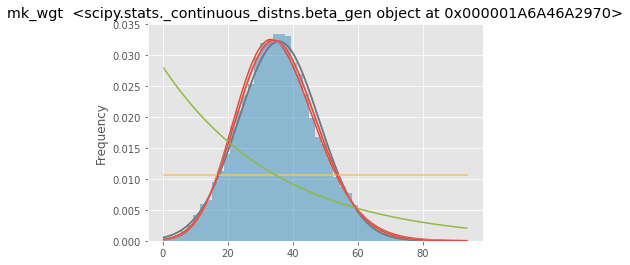

mk_wgt
(<scipy.stats._continuous_distns.beta_gen object at 0x000001A6A46A2970>, (74.21423106804852, 2113672566.0765886, -70.92818174532816, 3037058777.289765), 0.0006115372873062702)


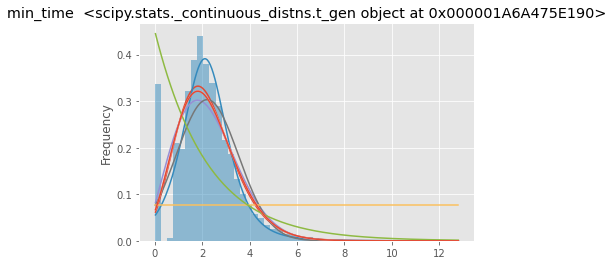

min_time
(<scipy.stats._continuous_distns.t_gen object at 0x000001A6A475E190>, (4.070352053246969, 2.1164754859857444, 0.9592593297473536), 1.8636397906023054)


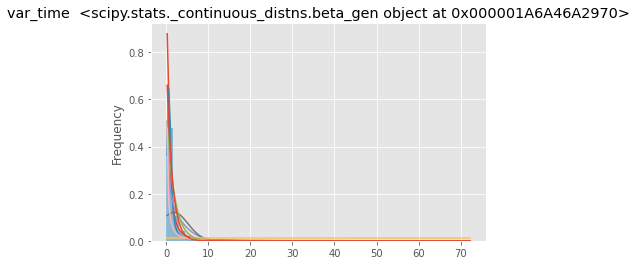

var_time
(<scipy.stats._continuous_distns.beta_gen object at 0x000001A6A46A2970>, (0.9956677954546717, 54.34009041169789, -1.918340746676202e-20, 72.47185282687757), 0.025223577555003377)


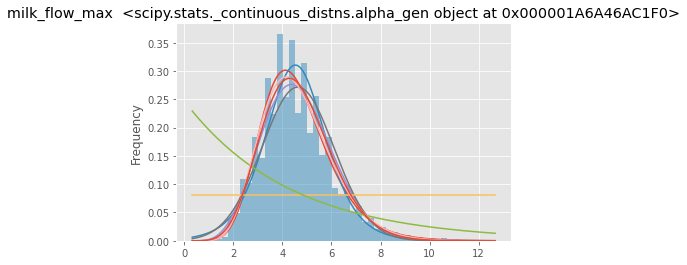

milk_flow_max
(<scipy.stats._continuous_distns.alpha_gen object at 0x000001A6A46AC1F0>, (7.871968920279862, -6.30330716209646, 84.64674375422427), 2.081929240257026)


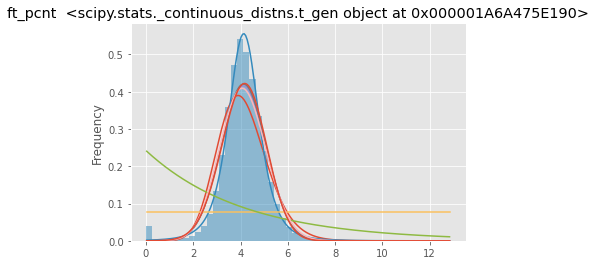

ft_pcnt
(<scipy.stats._continuous_distns.t_gen object at 0x000001A6A475E190>, (3.968662627014298, 4.1344583017886585, 0.674253436320053), 0.04803057651051612)


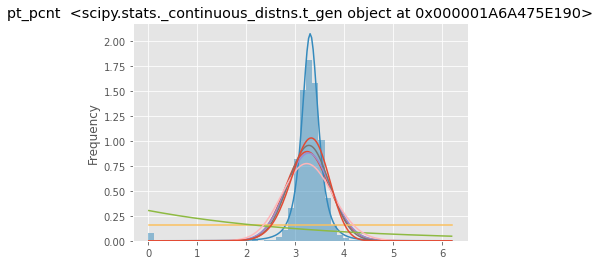

pt_pcnt
(<scipy.stats._continuous_distns.t_gen object at 0x000001A6A475E190>, (2.762727645256119, 3.3079738316147713, 0.1757384486562262), 0.6500002374275845)


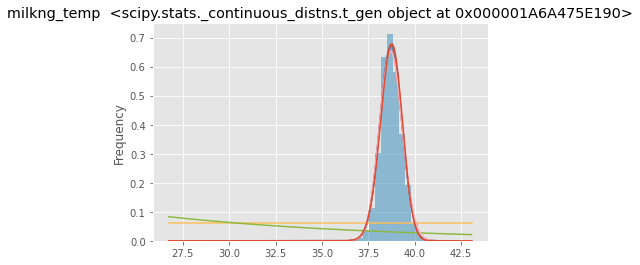

milkng_temp
(<scipy.stats._continuous_distns.t_gen object at 0x000001A6A475E190>, (14109.950810400811, 38.71937704709817, 0.5913941154619639), 0.18202694577433676)


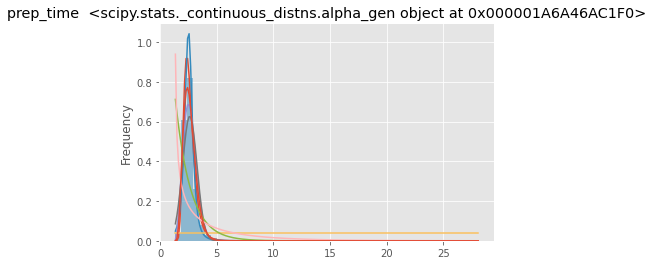

prep_time
(<scipy.stats._continuous_distns.alpha_gen object at 0x000001A6A46AC1F0>, (5.193603385476438, 0.13597989280438283, 12.381270303166673), 0.05716472570273279)


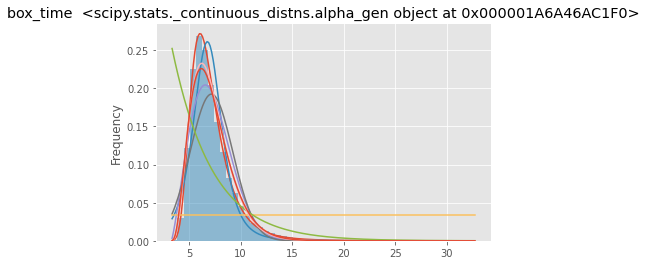

box_time
(<scipy.stats._continuous_distns.alpha_gen object at 0x000001A6A46AC1F0>, (4.197938263056656, -0.11046176033997168, 28.634219106380357), 0.0018071111315314929)


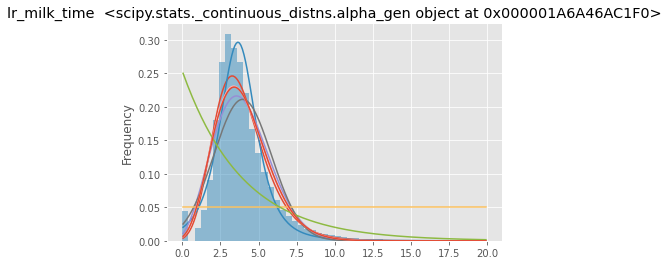

lr_milk_time
(<scipy.stats._continuous_distns.alpha_gen object at 0x000001A6A46AC1F0>, (7.275032181334042, -8.537972969209003, 89.04258685015965), 0.10243465225559065)


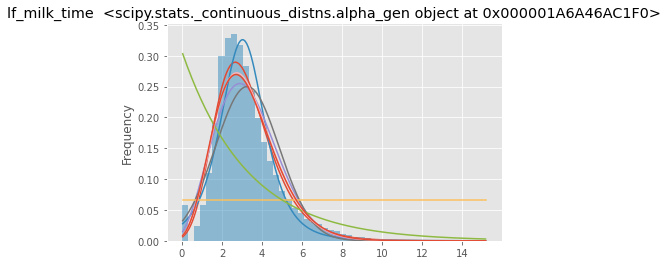

lf_milk_time
(<scipy.stats._continuous_distns.alpha_gen object at 0x000001A6A46AC1F0>, (7.049267726574039, -7.053870991520408, 71.15464463756922), 0.12396954556311957)


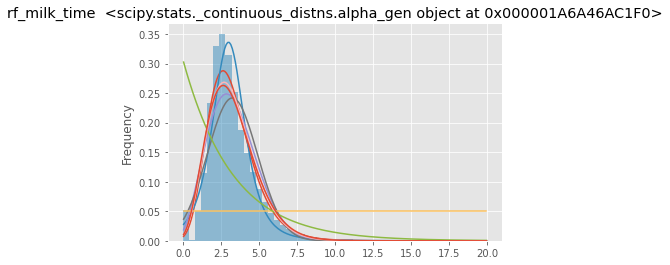

rf_milk_time
(<scipy.stats._continuous_distns.alpha_gen object at 0x000001A6A46AC1F0>, (6.917812602154985, -6.951868697896018, 69.02128372762617), 0.11523659559833507)


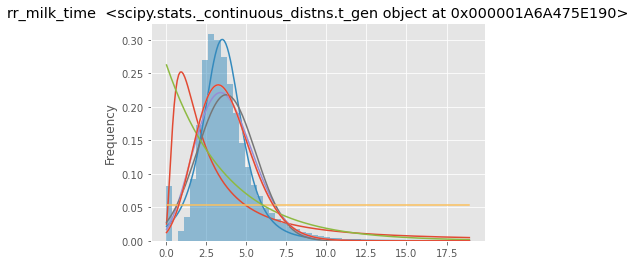

rr_milk_time
(<scipy.stats._continuous_distns.t_gen object at 0x000001A6A475E190>, (3.260152982885165, 3.5181087096208823, 1.2307727160839637), 0.17522996827372647)


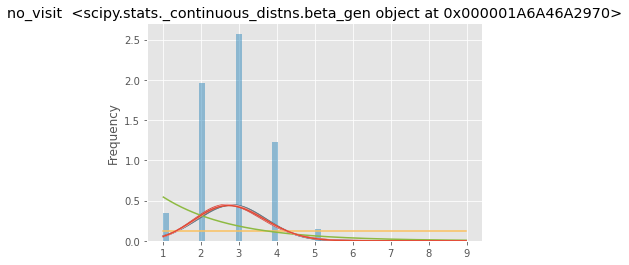

no_visit
(<scipy.stats._continuous_distns.beta_gen object at 0x000001A6A46A2970>, (13.362646867601121, 23.41234436129567, -1.342006500946978, 11.459125884366996), 185.61657047226015)
print scc separately as it contain nan value


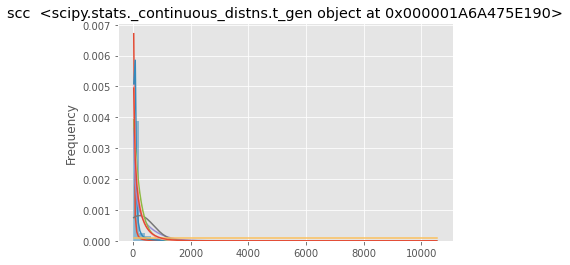

In [51]:
# due to nameing issue, put string with t in the end
common_dist = [ 'alpha', 't', 'chi', 'norm', 'uniform',  'expon', 'gamma', 'bernoulli','beta']
print("common_dist: ",  common_dist) 
# init ls to store best_dist 
ls_best_dist = [] 

print("loop through variable and plot the fitness of different distribution")
for i in range(df_test.shape[1]):
    data = df_test.iloc[:, i]
    #print("column name: ", ls_columns[i])
    # avoid ploting id
    if ls_columns[i] in ls_columns_plot:
        """using func: """
        best_dist = find_best_distribution(data, common_dist, ls_columns[i], plot=False)
        print(ls_columns[i])
        # append to store 
        ls_best_dist.append(best_dist)
        print(best_dist)
        
print("print scc separately as it contain nan value")
df_scc = df_test['scc'].dropna()
"""using func: """
best_dist = find_best_distribution(df_scc, common_dist, 'scc', plot=False)
# append to store 
ls_best_dist.append(best_dist)
ls_columns_plot.append('scc')

# For each herd, robot, parity, lataction stage, obtain means and variance

In [79]:
print("we'll do this for each herd")
ls_columns_plot = ['scc', 'mk_wgt', 'min_time', 'var_time', 'milk_flow_max', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'no_visit']
df_final.head()

we'll do this for each herd


,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
herd_cow_date,,,,,,,,,,,,,,,,,,,,,,,,
1000011-2022-02-24 00:18:10,13.8,HO,0.0,303.0,2.600000,0.664144,4.2,NaN,3.446602,3.102621,38.5,1000,11,2.233333,102.0,6.816667,3.616667,2.600000,3.783333,4.583333,3.0,3.0,1,4.0
1000011-2022-02-24 09:06:25,19.2,HO,0.0,303.0,3.483333,1.536551,4.4,NaN,2.660194,3.238544,39.0,1000,11,2.450000,102.0,8.916667,4.983333,3.483333,4.516667,6.466667,3.0,3.0,1,4.0
1000011-2022-02-24 17:05:29,17.6,HO,0.0,303.0,3.566667,1.089167,4.1,NaN,3.145631,3.141456,38.7,1000,11,2.316667,102.0,8.383333,4.566667,3.566667,4.366667,6.066667,3.0,3.0,1,4.0
1000011-2022-02-24 23:23:44,12.4,HO,0.0,303.0,2.883333,0.437130,4.1,NaN,3.757282,3.092913,38.4,1000,11,2.616667,102.0,6.900000,3.700000,2.966667,2.883333,4.283333,3.0,3.0,1,4.0
1000011-2022-02-25 08:53:58,21.3,HO,0.0,304.0,4.316667,1.439329,4.4,NaN,2.310680,3.364757,39.0,1000,11,2.383333,102.0,9.316667,5.233333,4.466667,4.316667,6.933333,3.0,3.0,1,4.0


In [84]:

""" 
func: 
    given a df 
    return a table df that has mean, var for each var in group 
args: 
    df: pandas 
    ls_category: list(str) to group dataset
    ls_var: list(str) list of variable 
    herd_id: int
return 
    df_table
"""
def get_table(df, ls_category, ls_var, herd_id, if_column_name=True):
    
    ## init a list, later concat to df 
    ls_table = [] 
    
    ## first create an overall summary 
    # save only var 
    df_all = df[ls_var]
    
    # name
    row = ['herd id ' + str(herd_id)] + ['-']*len(ls_var)
    ls_table.append(row)
    row = ['name'] + ls_var
    ls_table.append(row)
    
    # count
    row = df_all.count().tolist()
    row = [round(i, 3) for i in row]
    row.insert(0, 'count')
    ls_table.append(row)
    
    # mean
    row = df_all.mean().tolist()
    row = [round(i, 3) for i in row]
    row.insert(0, 'mean')
    ls_table.append(row)
    
    # std
    row = df_all.std().tolist()
    row = [round(i, 3) for i in row]
    row.insert(0, 'std')
    ls_table.append(row)
    
    # loop for each category
    for cat_name in ls_category:
    
        ## get the value from each category 
        ls_cat_value = df[cat_name].unique().tolist()
        ls_cat_value.sort()
        #print("ls_cat_value: ", ls_cat_value)

        # for each value 
        for value_id in range(len(ls_cat_value)):
            ## get the mean and variance of that category-value
            df_group = df[df[cat_name] == ls_cat_value[value_id]]
            # save only var 
            df_group = df_group[ls_var]
            
            if if_column_name:
                # append to result 
                row = [cat_name + ' ' + str(ls_cat_value[value_id])] + ['-']*len(ls_var)
                ls_table.append(row)
                row = ['name'] + ls_var
                ls_table.append(row)
            
            # count
            row = df_group.count().tolist()
            row = [round(i, 3) for i in row]
            row.insert(0, 'count')
            ls_table.append(row)
            
            # mean
            row = df_group.mean().tolist()
            row = [round(i, 3) for i in row]
            row.insert(0, 'mean')
            ls_table.append(row)

            # std
            row = df_group.std().tolist()
            row = [round(i, 3) for i in row]
            row.insert(0, 'std')
            ls_table.append(row)
    
    ## organize to df and return
    np_table = np.array(ls_table) 
    df_table = pd.DataFrame(np_table)
    return df_table

In [87]:
df_herd = df_final[df_final['hrd_ida']==7]
print("picked a herd: ", df_herd.shape)
# make sure stall_no is the frist
# ls_category = ['stall_no', 'lact_no', 'lact_stage']
ls_category = [ 'parity', 'lact_stage']
print("ls_category: ", ls_category)

"""using func: """
df_table = get_table(df_herd, ls_category, ls_columns_plot, 7)
df_table

picked a herd:  (34631, 24)
ls_category:  ['parity', 'lact_stage']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,herd id 7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,name,scc,mk_wgt,min_time,var_time,milk_flow_max,ft_pcnt,pt_pcnt,milkng_temp,prep_time,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,no_visit
2,count,0,34631,34625,34625,34625,34631,34631,34492,34625,34631,34625,34625,34625,34625,34631
3,mean,nan,11.725,2.295,1.326,4.322,4.279,3.429,38.189,2.254,6.571,3.597,2.973,3.006,3.731,1.0
4,std,nan,4.065,1.434,2.701,1.433,1.052,0.633,4.614,1.108,2.295,1.941,1.651,1.649,1.956,0.0
5,parity 1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,name,scc,mk_wgt,min_time,var_time,milk_flow_max,ft_pcnt,pt_pcnt,milkng_temp,prep_time,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,no_visit
7,count,0,6451,6449,6449,6449,6451,6451,6416,6449,6451,6449,6449,6449,6449,6451
8,mean,nan,9.493,1.978,0.749,4.202,4.586,3.57,38.315,2.439,5.947,2.777,2.503,2.505,3.233,1.0
9,std,nan,2.76,1.104,1.231,1.448,1.111,0.605,3.814,1.878,2.246,1.347,1.291,1.12,1.341,0.0


In [88]:
print("function to write to a excel file")
from pandas import ExcelWriter
# from pandas.io.parsers import ExcelWriter
def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'sheet%s' % n)

function to write to a excel file


In [89]:
""" 
func: 
    operational func that use get_table and save_xls 
args: 
    df: pandas of all herds
    ls_category: list(str) to group dataset
    ls_var: list(str) list of variable 
    xls_path: str path for the excel file (including name)
return: 
    a excel file
"""
def get_stat_table(df, ls_category, ls_var, xls_path):
    
    ## get the list of herd id, and loop usin get_table
    # init list df 
    ls_df = [] 
    ls_herd_id = df['hrd_ida'].unique().tolist() 
    
    # first do this for all herds 
    df_table = get_table(df, ls_category[1:], ls_columns_plot, herd_id=-1)
    ls_df.append(df_table) 
    # sort herd id to make excel file more accessable 
    ls_herd_id.sort()
        
    for herd_id in ls_herd_id: 
        print("processing herd: ", herd_id)
        """using func"""
        df_herd = df[df['hrd_ida']==herd_id]
        df_table = get_table(df_herd, ls_category, ls_columns_plot, herd_id)
        ls_df.append(df_table) 

        ## convert to excel
        save_xls(ls_df, xls_path)

In [92]:
#xls_path = "data/stat_mean_std_2024_04_12.xlsx"
#get_stat_table(df_final, ls_category, ls_columns_plot, xls_path)

print("get for all")
df_table = get_table(df_final, ls_category, ls_columns_plot, 'All')
df_table.to_csv("../Data/all_herd_stat.csv")

get for all


# Cluster herd, cluster cow

In [5]:
print("Use the descriptive statistics dataset for herd clustering: ")
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import os
os.environ["OMP_NUM_THREADS"] = "1" 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

Use the descriptive statistics dataset for herd clustering: 


In [19]:
print("use a cleaned dataset: ") 
#df_final = pd.read_csv("../Data/clean_visit_52herds.csv")
print("done!")

use a cleaned dataset: 
done!


In [6]:

""" 
func: 
    given a df 
    return a list of variable for a herd
args: 
    df: pandas 
    ls_category: list(str) to group dataset
    ls_var: list(str) list of variable 
    herd_id: int
return 
    ls_variables
"""
def get_variables(df, ls_category, ls_var, herd_id):
    
    ##  
    ls_variables = [] 
    
    ## first create an overall summary 
    # save only var 
    df_all = df[ls_var]
    
    # mean
    row = df_all.mean().tolist()
    row = [round(i, 3) for i in row]
    ls_variables += row
    
    # std
    row = df_all.std().tolist()
    row = [round(i, 3) for i in row]
    ls_variables += row
    
    return ls_variables

""" 
func: 
    operational func that get variables_data: numpy
args: 
    df: pandas of all herds
    ls_category: list(str) to group dataset
    ls_var: list(str) list of variable 
return: 
    variables_data: numpy
"""
def get_variables_data(df, ls_category, ls_var):
    
    ## get the list of herd id, and loop usin get_table
    # init list df 
    np_variables = [] 
    ls_herd_id = df['hrd_ida'].unique().tolist() 
        
    for herd_id in ls_herd_id: 
        #print("processing herd: ", herd_id)
        # get herd by id
        df_herd = df[df['hrd_ida']==herd_id]
        """using func"""
        ls_variables = get_variables(df_herd, ls_category, ls_columns_plot, herd_id)
        # append to np
        np_variables.append(ls_variables) 
    
    # type transform to np
    return np.array(np_variables), ls_herd_id

### Data processing to be prepared for clustering

In [7]:
ls_columns_plot = ['scc', 'mk_wgt', 'min_time', 'var_time', 'milk_flow_max', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'no_visit']
# try without ft and pt
# ls_columns_plot = ['mk_wgt', 'min_time', 'var_time', 'milk_flow_max', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'no_visit']


df_herd = df_final[df_final['hrd_ida']==7]
print("picked a herd: ", df_herd.shape)
# make sure stall_no is the frist
ls_category = ['parity', 'lact_stage']
print("ls_category: ", ls_category)

"""using func: """
ls_variables = get_variables(df_herd, ls_category, ls_columns_plot, 7)
print("ls_variables: ", ls_variables)

"""using func: """
np_variables, ls_herd_id = get_variables_data(df_final, ls_category, ls_columns_plot)

picked a herd:  (34631, 25)
ls_category:  ['parity', 'lact_stage']
ls_variables:  [nan, 11.725, 2.295, 1.326, 4.322, 4.279, 3.429, 38.189, 2.254, 6.571, 3.597, 2.973, 3.006, 3.731, 1.0, nan, 4.065, 1.434, 2.701, 1.433, 1.052, 0.633, 4.614, 1.108, 2.295, 1.941, 1.651, 1.649, 1.956, 0.0]


In [63]:
df_final['scc'].mean(), df_final['scc'].std()

(273.7700351729468, 537.2646942116928)

In [8]:
print("replace nan with column mean")

a = np_variables
#Obtain mean of columns as you need, nanmean is convenient.
col_mean = np.nanmean(a, axis=0)

#Find indices that you need to replace
inds = np.where(np.isnan(a))

#Place column means in the indices. Align the arrays using take
a[inds] = np.take(col_mean, inds[1])

replace nan with column mean


In [9]:
print("np_variables: ", np_variables.shape)
print("normalize the data as required by the clustering methods")

X = a
X = normalize(X, axis=0, norm='max')

# set X 
print("we get X as the input")
print("X.mean(), X.std(): " ,X.mean(), X.std())
print(X[:, 4])
print(X.shape)

np_variables:  (52, 30)
normalize the data as required by the clustering methods
we get X as the input
X.mean(), X.std():  0.6906979981403587 0.2546520350149865
[0.85395349 0.90939535 0.78027907 0.75534884 0.84204651 0.94586047
 0.90809302 0.87497674 0.96576744 0.65283721 0.76186047 0.96037209
 0.71088372 0.80409302 0.86344186 0.71106977 1.         0.74734884
 0.78102326 0.7944186  0.81116279 0.75665116 0.89395349 0.85190698
 0.65451163 0.81711628 0.75516279 0.75665116 0.56930233 0.83013953
 0.69934884 0.8747907  0.69693023 0.92539535 0.78009302 0.85283721
 0.4984186  0.82604651 0.856      0.74232558 0.80353488 0.80427907
 0.8455814  0.71776744 0.89897674 0.7655814  0.61488372 0.51795349
 0.74865116 0.89302326 0.68874419 0.808     ]
(52, 30)


# Clustering with K-means

We can plot k vs. inertias to pick a reasonable k


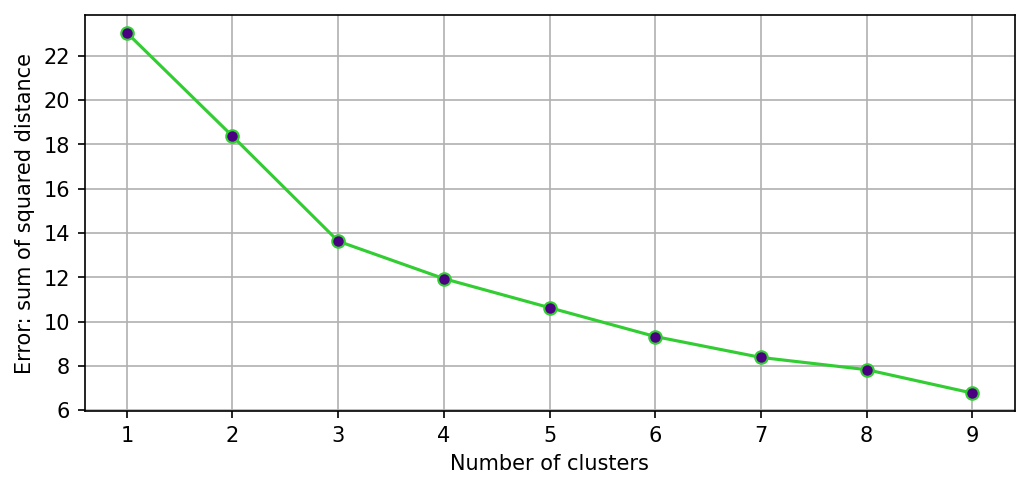

In [66]:
print("We can plot k vs. inertias to pick a reasonable k")

# init and fit 10 kmeans with different k 
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]

# compute inertias for each kmeans
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5), dpi=150)
plt.plot(range(1, 10), inertias, color='limegreen', marker='o', linestyle='-', markerfacecolor='indigo')
plt.xlabel("Number of clusters")
plt.ylabel("Error: sum of squared distance")
# plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show() 

In [10]:


k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)

# init result
result_cluster = [[] for i in range(len(set(y_pred)))]
# loop y_pred to see the herd id in cluster 
for i in range(len(y_pred)): 
    cluster_id = y_pred[i]
    #print(cluster_id)
    #print(ls_herd_id[i])
    result_cluster[cluster_id].append(ls_herd_id[i])
    #print(result_cluster) 
    
print("result_cluster by herd id: ", result_cluster)
print()
print("Sum of squared distances")
X_dist = kmeans.transform(X)
print((X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum())



result_cluster by herd id:  [[43, 34, 18, 33, 24, 15, 36, 16, 42, 37, 3, 13, 27, 28, 25, 22, 14, 21], [7, 47, 35, 6, 4, 26, 40, 31, 2, 23, 50, 45], [11, 8, 9, 49, 48, 29, 32, 12, 5, 51, 44, 0, 10, 30, 46, 20, 1, 39], [19, 41], [38, 17]]

Sum of squared distances
11.226931521847225


In [68]:
print("len: ", len(ls_columns_plot))
ls_columns_plot

len:  15


['scc',
 'mk_wgt',
 'min_time',
 'var_time',
 'milk_flow_max',
 'ft_pcnt',
 'pt_pcnt',
 'milkng_temp',
 'prep_time',
 'box_time',
 'lr_milk_time',
 'lf_milk_time',
 'rf_milk_time',
 'rr_milk_time',
 'no_visit']

last


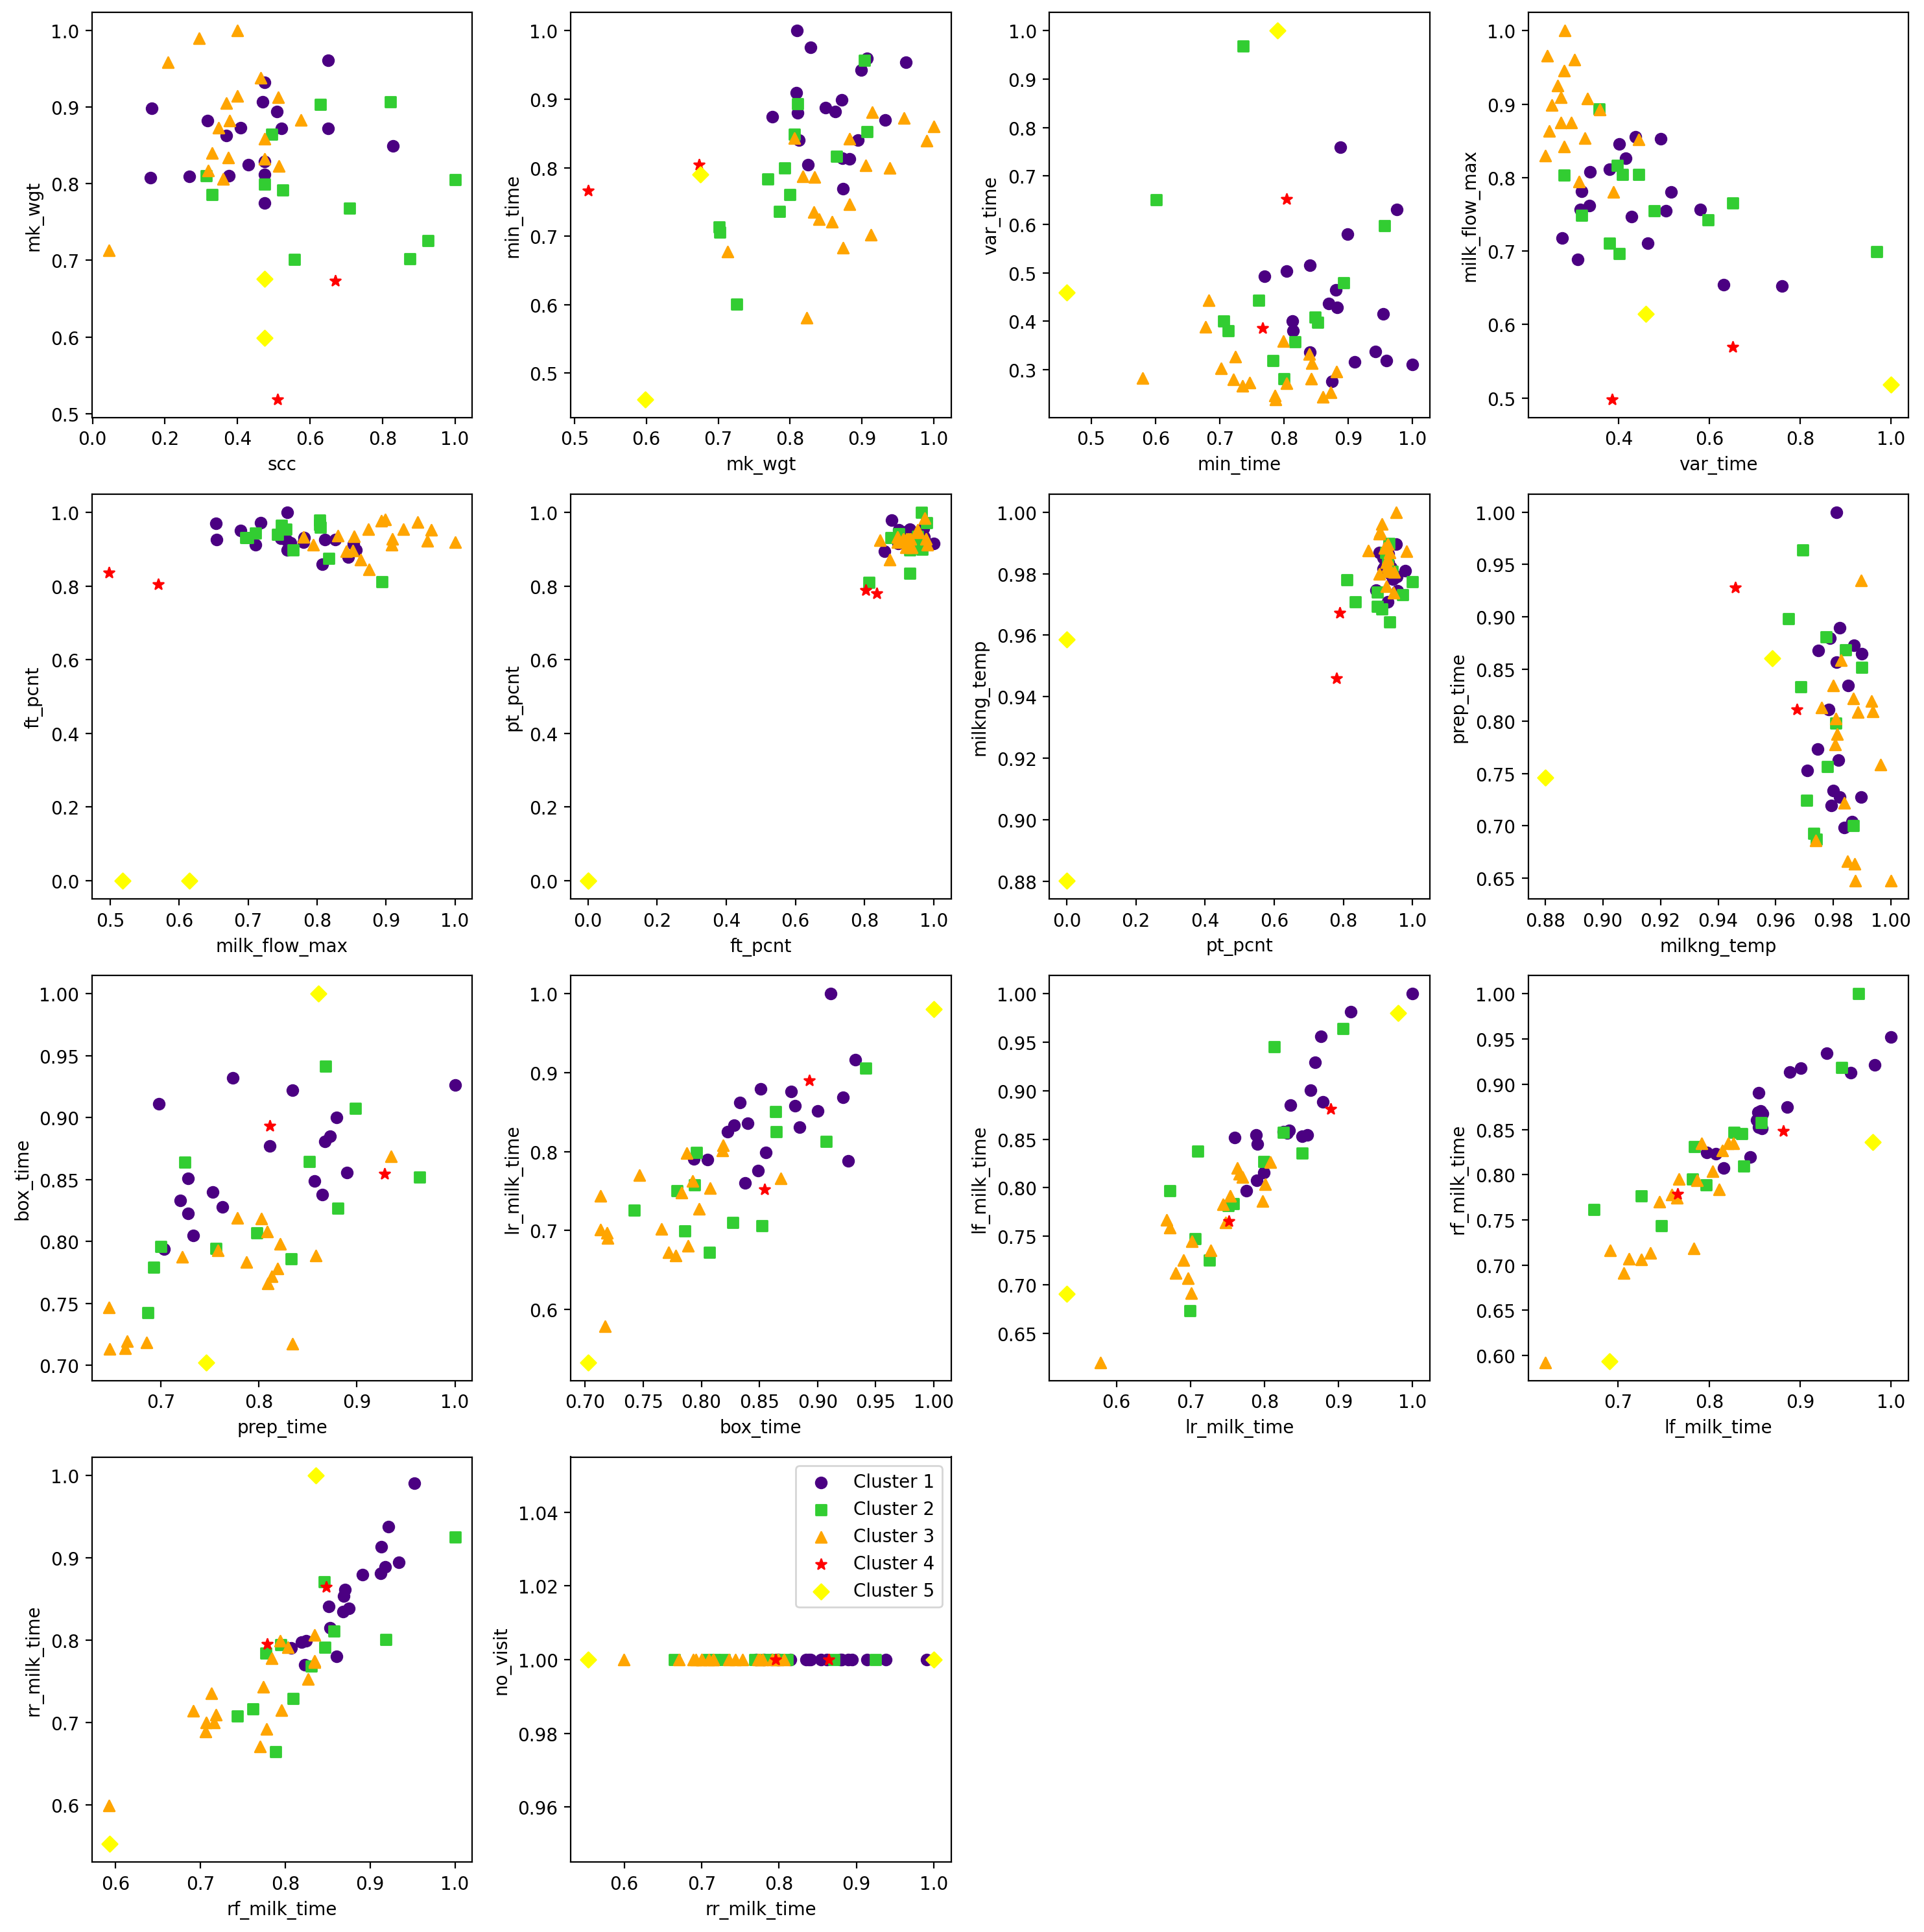

In [69]:
# Create a figure and subplots
fig, axs = plt.subplots(4, 4, figsize=(15, 15), dpi=200)

# Flatten the axs array to iterate over all subplots
axs = axs.flatten()

# looping
for i in range(len(ls_columns_plot)-1):
    # var_idx store the idx of variables in x and y axis
    var_idx = [i, i+1]
    # for label 0, 1, 2, print by 2nd and 3rd variable
    axs[i].scatter(X[y_pred==0, var_idx[0]], X[y_pred==0, var_idx[1]], marker = "o", color="indigo", label="Cluster 1")
    axs[i].scatter(X[y_pred==1, var_idx[0]], X[y_pred==1, var_idx[1]], marker = "s", color="limegreen", label="Cluster 2")
    axs[i].scatter(X[y_pred==2, var_idx[0]], X[y_pred==2, var_idx[1]], marker = "^", color="orange", label="Cluster 3")
    axs[i].scatter(X[y_pred==3, var_idx[0]], X[y_pred==3, var_idx[1]], marker = "*", color="red", label="Cluster 4")
    axs[i].scatter(X[y_pred==4, var_idx[0]], X[y_pred==4, var_idx[1]], marker = "D", color="yellow", label="Cluster 5")

    axs[i].set_xlabel(ls_columns_plot[var_idx[0]])
    axs[i].set_ylabel(ls_columns_plot[var_idx[1]])
    # only show legend once 
    if i == len(ls_columns_plot)-2:
        print("last")
        axs[i].legend()
    
num_plots = len(ls_columns_plot)
# Hide the empty subplot if present
if num_plots < len(axs):
    axs[-1].axis('off')
    axs[-2].axis('off')
    
# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Compare three groups gives by the clustering

In [18]:

def plot_3box(df_ls, check_column): 

    # create the figure and two subplots
    fig, axes = plt.subplots(ncols=len(check_column), figsize=(20, 15), dpi=250)

    # create the boxplot with Seaborn
    for column, axis in zip(check_column, axes):

        # dealing with nan 
        if df_ls[0][column].isnull().any() or df_ls[-1][column].isnull().any(): 
            #print(column, "nan")
            
            # create a temp df for ploting
            ls_ls = [df[column].dropna().tolist() for df in df_ls]

            axis.boxplot(ls_ls, showfliers=False, boxprops=dict(color="indigo"), medianprops=dict(color="green"))

            # set name
            axis.set_title(column)
            #axis.set(xticklabels=[], xticks=[], ylabel=column)
        else: 
            #print(column)
            # create a temp df for ploting
            ls_ls= [df[column].tolist() for df in df_ls]

            axis.boxplot(ls_ls, showfliers=False, boxprops=dict(color="indigo"), medianprops=dict(color="green"))

            # set name
            axis.set_title(column)
        
    # show the plot
    plt.tight_layout()
    plt.show()
    

df_ls = [df_final[df_final['hrd_ida'].isin(group_id)] for group_id in result_cluster]
column1 = ['dim', 'scc', 'mk_wgt', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'lact_no']
column2 = ['prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'milk_flow_max']
"""using func: """
#plot_3box(df_ls, column1)

'using func: '

In [19]:
"""using func: """
#plot_3box(df_ls, column2)

'using func: '

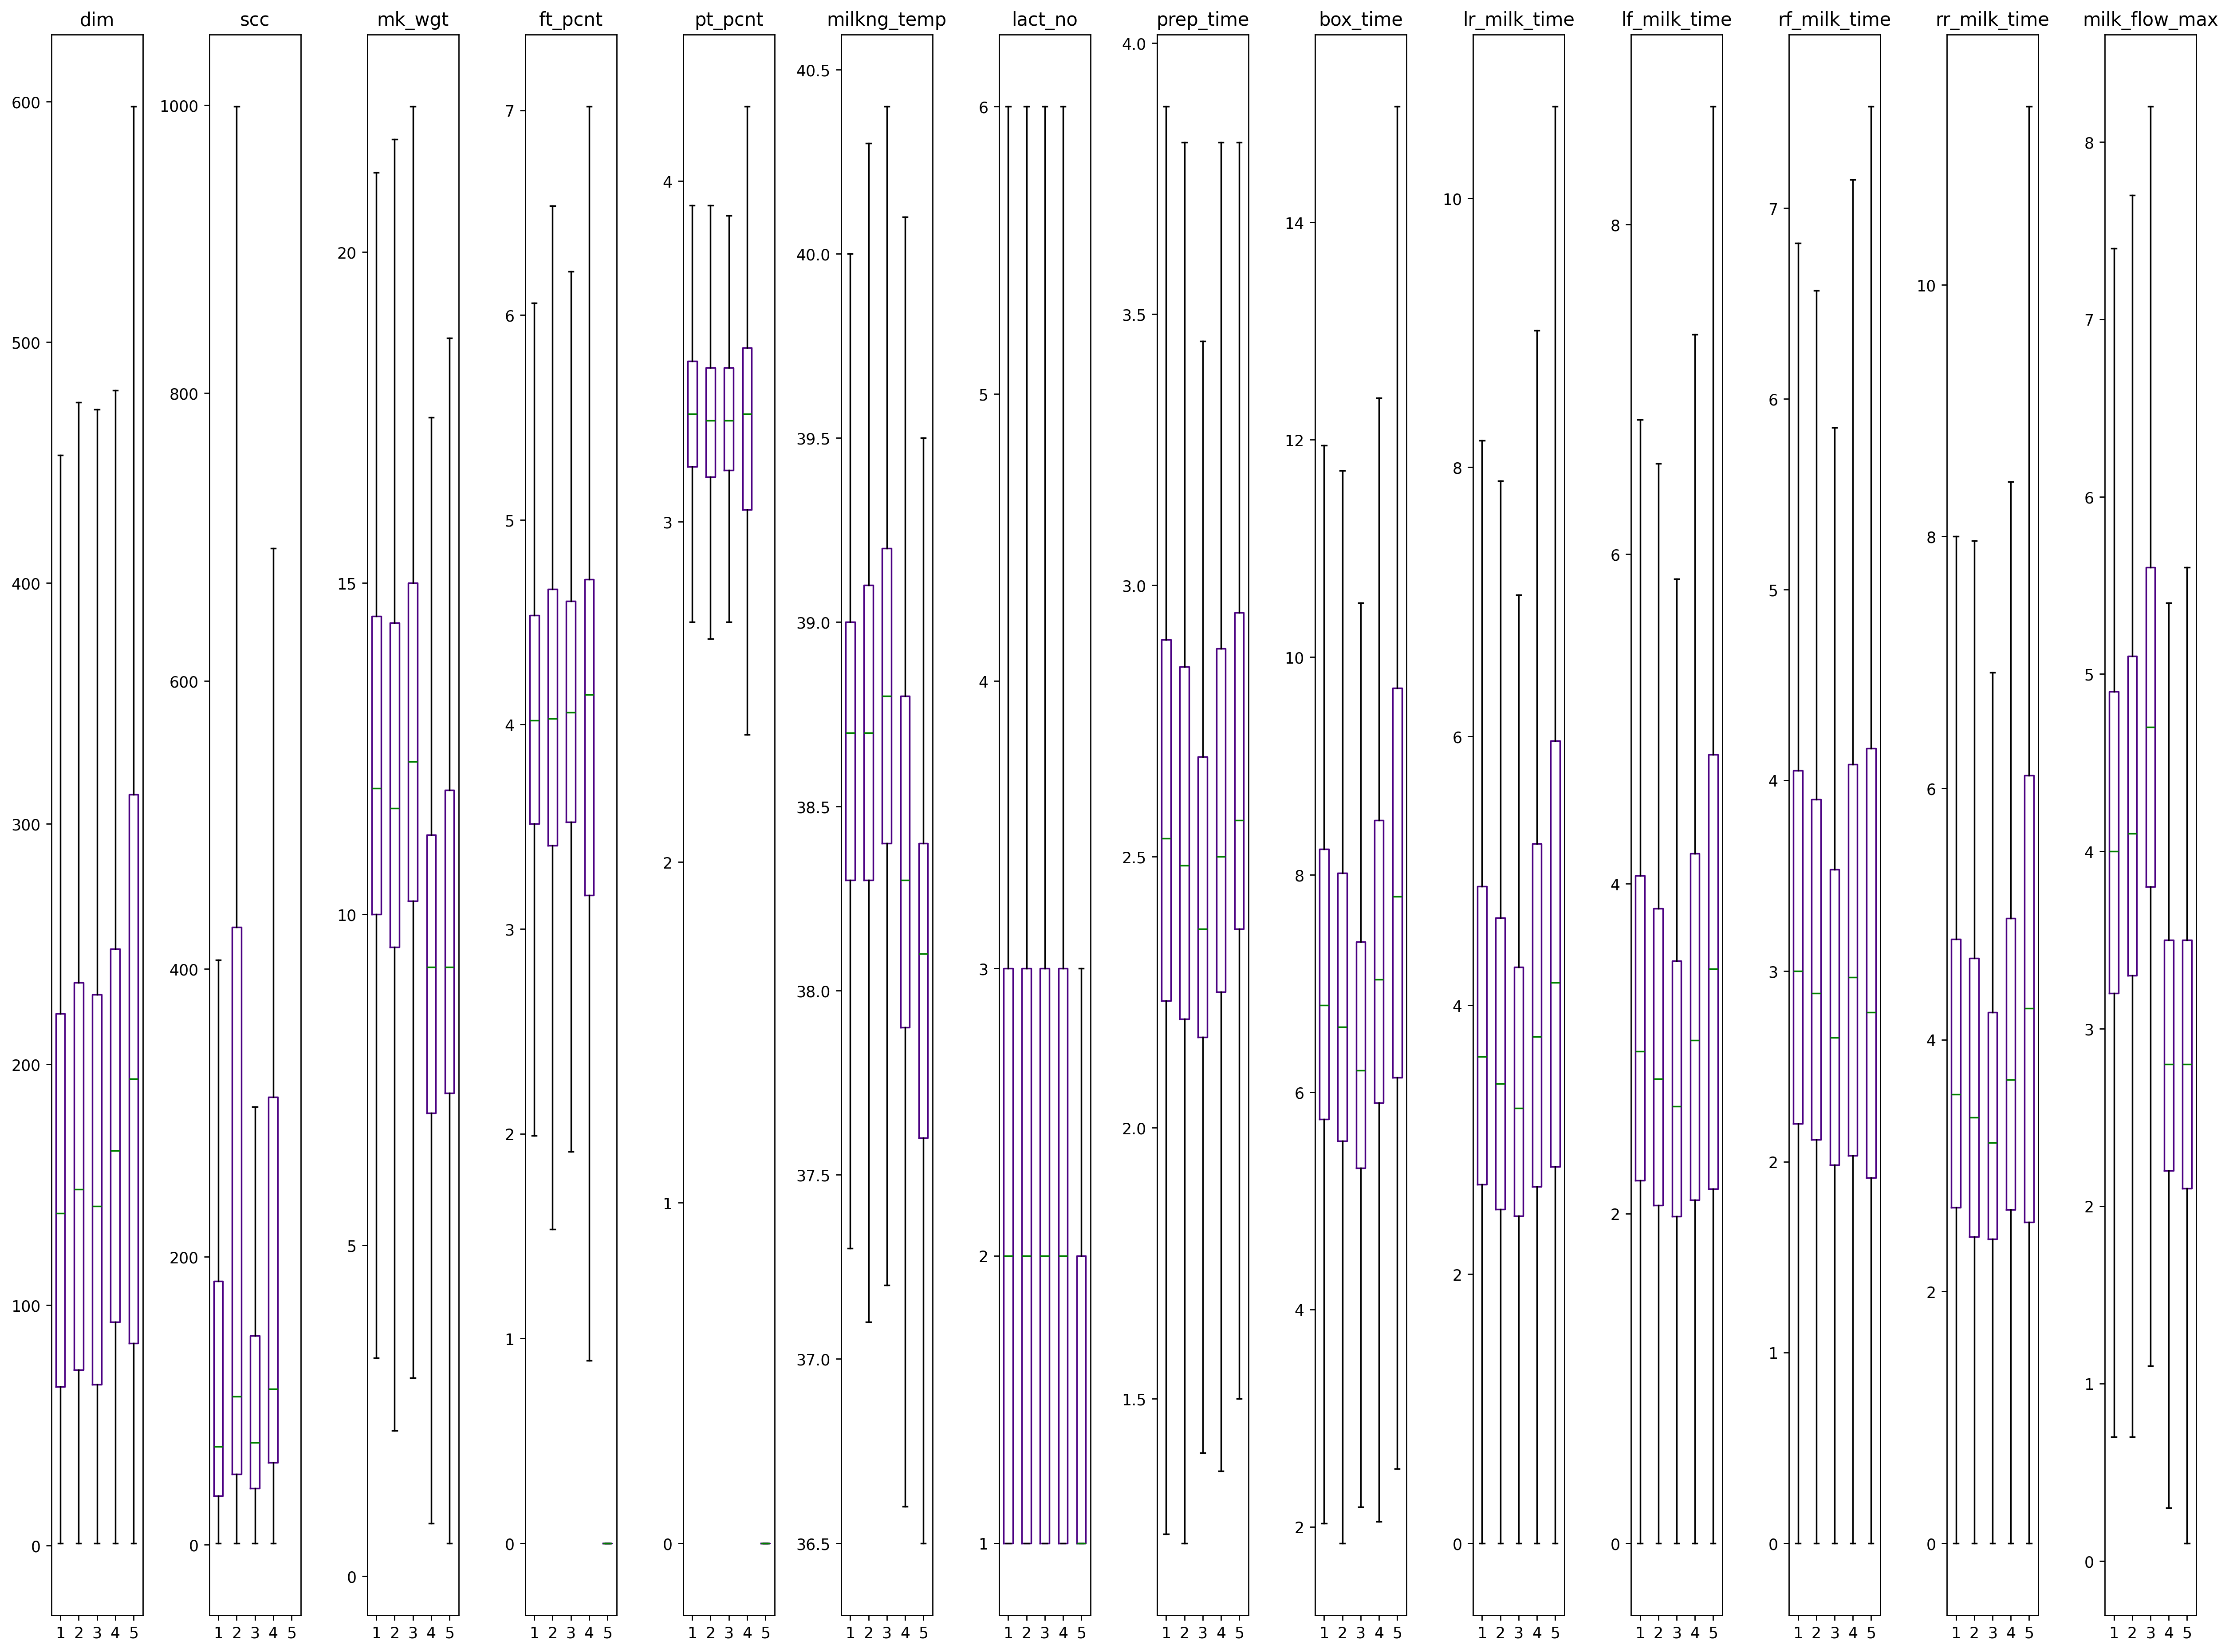

In [20]:
plot_3box(df_ls, column1+column2)

In [74]:
df_check = df_final[df_final['hrd_ida'].isin([38, 17])] 
df_check.describe()

,mk_wgt,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
count,4218.000000,4218.000000,4218.000000,4217.000000,4217.000000,4217.000000,0.0,4218.0,4218.0,4205.000000,4218.000000,4218.000000,4217.000000,4218.0,4218.000000,4217.000000,4217.000000,4217.000000,4217.000000,4218.000000,4218.000000,4218.0,4218.000000
mean,9.761119,0.043860,228.629919,2.256798,2.778322,2.851269,NaN,0.0,0.0,37.220238,3889.967520,19.708393,2.753099,101.0,8.109076,4.422030,3.586776,3.044329,4.424184,2.183499,1.708630,1.0,1.940730
std,4.362469,0.204807,191.229584,1.753571,3.802222,1.020510,NaN,0.0,0.0,5.391530,2267.139584,7.039361,0.780380,0.0,2.525362,2.470717,1.928008,1.895311,2.643053,0.865097,0.805616,0.0,1.251718
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.000000,166.000000,17.000000,0.400000,101.0,0.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000
25%,7.300000,0.000000,84.000000,0.850000,0.531921,2.100000,NaN,0.0,0.0,37.600000,2016.000000,17.000000,2.366667,101.0,6.133333,2.800000,2.150000,1.916667,2.550000,1.000000,1.000000,1.0,1.000000
50%,9.200000,0.000000,194.000000,2.033333,1.497292,2.800000,NaN,0.0,0.0,38.100000,3843.000000,17.000000,2.566667,101.0,7.800000,4.166667,3.483333,2.783333,4.250000,2.000000,1.000000,1.0,1.000000
75%,11.875000,0.000000,312.000000,3.316667,3.627292,3.500000,NaN,0.0,0.0,38.400000,6285.000000,17.000000,2.950000,101.0,9.716667,5.966667,4.783333,4.166667,6.100000,3.000000,2.000000,1.0,2.000000
max,29.600000,1.000000,899.000000,8.833333,73.601481,6.800000,NaN,0.0,0.0,40.500000,7586.000000,38.000000,7.650000,101.0,22.300000,20.000000,16.233333,12.066667,15.283333,3.000000,3.000000,1.0,5.000000


In [76]:
df_check = df_final[df_final['hrd_ida'].isin([19, 41])] 
df_check.describe()

,mk_wgt,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
count,28433.000000,28433.000000,28433.000000,28425.000000,28425.000000,28425.000000,8472.000000,28433.000000,28433.000000,28287.000000,28433.000000,28433.000000,28425.000000,28433.000000,28433.000000,28425.000000,28425.000000,28425.000000,28425.000000,28433.000000,28433.000000,28433.0,28433.000000
mean,9.187142,0.036859,176.829213,2.392453,1.706341,2.944953,346.042139,3.556048,2.777554,37.700643,4097.863328,25.658109,2.756062,101.361200,7.433910,4.064269,3.220101,3.128483,3.961103,2.114972,2.090177,1.0,2.393451
std,3.587220,0.188418,110.584857,1.680292,2.817896,1.134053,639.113733,1.854657,1.332322,4.608813,2397.373268,10.107006,1.096832,0.480357,2.308350,2.242057,1.758631,1.844513,2.104205,0.803043,0.854882,0.0,1.418850
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.000000,19.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000
25%,7.000000,0.000000,93.000000,1.366667,0.223958,2.200000,57.000000,3.165049,3.034660,37.900000,2394.000000,19.000000,2.250000,101.000000,5.900000,2.650000,2.083333,2.033333,2.650000,1.000000,1.000000,1.0,1.000000
50%,9.200000,0.000000,164.000000,2.333333,0.635370,2.800000,108.000000,4.145631,3.316214,38.300000,3759.000000,19.000000,2.500000,101.000000,7.033333,3.766667,3.050000,2.966667,3.683333,2.000000,2.000000,1.0,2.000000
75%,11.200000,0.000000,248.000000,3.300000,1.811389,3.500000,311.000000,4.708738,3.510388,38.800000,6245.000000,41.000000,2.883333,102.000000,8.500000,5.200000,4.183333,4.083333,4.966667,3.000000,3.000000,1.0,3.000000
max,35.400000,1.000000,818.000000,15.683333,39.641574,12.700000,5456.000000,10.203883,5.490971,41.700000,8004.000000,41.000000,50.066667,102.000000,53.116667,19.033333,16.466667,20.200000,16.816667,3.000000,3.000000,1.0,8.000000


In [78]:
df_check = df_final[~df_final['hrd_ida'].isin([19, 41, 38, 17])] 
df_check.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,mk_wgt,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
count,3178305.000,3178305.000,3178305.000,3177750.000,3177750.000,3177750.000,942543.000,3178305.000,3178305.000,3172780.000,3178305.000,3178305.000,3177750.000,3178305.000,3178305.000,3177750.000,3177750.000,3177750.000,3177750.000,3178305.000,3178305.000,3178305.000,3178305.000
mean,12.554,0.020,157.206,2.473,1.116,4.412,273.120,4.012,3.261,38.523,3995.676,25.346,2.617,102.176,6.926,3.729,3.078,3.078,3.689,1.955,2.064,1.000,2.450
std,4.142,0.141,115.691,1.389,2.268,1.439,536.218,1.035,0.505,2.771,2303.274,15.749,0.870,1.738,2.097,1.872,1.587,1.568,1.866,0.828,0.850,0.000,1.500
min,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,-8.433,101.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
25%,10.000,0.000,68.000,1.683,0.161,3.400,39.000,3.505,3.151,38.300,1992.000,12.000,2.200,101.000,5.517,2.533,2.083,2.083,2.517,1.000,1.000,1.000,1.000
50%,12.000,0.000,141.000,2.350,0.430,4.300,75.000,4.039,3.307,38.700,3982.000,27.000,2.450,102.000,6.517,3.417,2.817,2.833,3.367,2.000,2.000,1.000,2.000
75%,14.700,0.000,227.000,3.167,1.126,5.300,198.000,4.583,3.462,39.100,5985.000,40.000,2.800,103.000,7.867,4.600,3.800,3.817,4.533,3.000,3.000,1.000,3.000
max,54.400,1.000,1393.000,15.983,96.177,12.700,10552.000,14.340,6.578,58.600,8013.000,51.000,115.933,112.000,118.400,22.000,20.933,20.817,22.000,3.000,3.000,1.000,11.000


# Clustering with GaussianMixture

In [75]:

print("GaussianMixture with n_components")
n = 5
"""using sklearn function"""
y_pred = GaussianMixture(n_components=n, random_state=42).fit(X).predict(X)

# init result
result_cluster = [[] for i in range(len(set(y_pred)))]
# loop y_pred to see the herd id in cluster 
for i in range(len(y_pred)): 
    cluster_id = y_pred[i]
    #print(cluster_id)
    #print(ls_herd_id[i])
    result_cluster[cluster_id].append(ls_herd_id[i])
    #print(result_cluster) 
print("result_cluster by herd id: ", result_cluster)



GaussianMixture with n_components
result_cluster by herd id:  [[43, 34, 18, 33, 24, 15, 36, 16, 42, 37, 3, 13, 27, 28, 25, 22, 14, 21], [7, 47, 35, 6, 4, 26, 40, 31, 2, 23, 50, 45], [11, 8, 9, 49, 48, 29, 32, 12, 5, 51, 44, 0, 10, 30, 46, 20, 1, 39], [19, 41], [38, 17]]
